# Final Project Code for DSC550
# Katie Briggs
# Topic: Recalls

In [12]:
# import libraries 
from bs4 import BeautifulSoup 
  

# Process Recalls for the year 2020

In [15]:
# Reading the data inside the xml 
# file to a variable under the name  
# recall_data 
recall_data = open('recalls2020.xml', encoding="utf8")  

In [17]:
# Passing the stored data inside 
# the beautifulsoup parser, storing 
# the returned object  
Bs_data = BeautifulSoup(recall_data, "xml") 

In [18]:
# Finding all instances of tag  
# `recall` 
b_recall = Bs_data.find_all("recall") 
  
print(b_recall) 

[<recall>
<Brand>Jaloma</Brand>
<Company>Laboratorios Jaloma S.A. de C.V.</Company>
<Date>8/1/20</Date>
<ProductDescription>Hand Sanitizer</ProductDescription>
<Reason>Undeclared Methanol</Reason>
<Url>https://www.fda.gov/safety/recalls-market-withdrawals-safety-alerts/laboratorios-jaloma-sa-de-cv-issues-voluntary-recall-jaloma-antiseptic-hand-sanitizer-due-potential</Url>
</recall>, <recall>
<Brand>Earth Grown</Brand>
<Company>SmithFoods Inc.</Company>
<Date>7/31/20</Date>
<ProductDescription>Vegan Non-Dairy Almond Based Frozen Desserts</ProductDescription>
<Reason>Undeclared cashew</Reason>
<Url>https://www.fda.gov/safety/recalls-market-withdrawals-safety-alerts/smithfoods-inc-issues-allergy-alert-undeclared-cashew-allergen-earth-grown-vegan-non-dairy-almond</Url>
</recall>, <recall>
<Brand>Nuuxsan, Modesa, Assured, more</Brand>
<Company>Albek de Mexico S.A. de C.V</Company>
<Date>7/31/20</Date>
<ProductDescription>Hand Sanitizer</ProductDescription>
<Reason>Undeclared Methanol</Reas

In [19]:
# Find all products that have been recalled
b_product = Bs_data.find_all("ProductDescription") 
  
print(b_product)

[<ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>Vegan Non-Dairy Almond Based Frozen Desserts</ProductDescription>, <ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>Watermelon CBD oil tincture</ProductDescription>, <ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>Iron Drops liquid Dietary Supplement and Iron Drops Sample liquid Dietary Supplement</ProductDescription>, <ProductDescription>Hand Sanitizer</ProductDescription>, <ProductDescription>"UpSpring Baby Iron + Immunity" dietary supplements</ProductDescription>, <ProductDescription>Hand Sanitizer Gel</ProductDescription>, <ProductDescription>Kouign-amann pastries</ProductDescription>, <ProductDescription>Chantilly Key Lime Tartlets</ProductDescription>, <ProductDescription>Dexmedetomidine Hydrochloride Injection, 200 mcg/50 mL</ProductD

In [25]:
# import libraries to place tags into dataframe
import xml.etree.ElementTree as et 
import pandas as pd

In [118]:
parsedxml = et.parse("recalls2020.xml")
xroot = xtree.getroot()

In [59]:
# create the columns for the dataframe
df_cols = ["Brand", "Company", "ProductDescription", "Reason"]
rows = []

In [60]:
for node in xroot: 
    s_brand = node.attrib.get("Brand")
    s_company = node.find("Company") 
    s_product = node.find("ProdcutDescription")
    s_reason = node.find("Reason")

In [61]:
rows.append({"Brand": s_brand, "Company": s_company, 
                 "ProductDescription": s_product, "Reason": s_reason})

In [62]:
out_df = pd.DataFrame(rows, columns = df_cols)
out_df

,Brand,Company,ProductDescription,Reason
0,None,[],None,[]


In [67]:
def getvalueofnode(node):
    """ return node text or None for error handling"""
    return node.text if node is not None else None
 
 
def main():
    """ main """
    parsed_xml = et.parse("recalls2020.xml")
    dfcols = ['Brand', 'Company', 'ProductDescription', 'Reason']
    df_xml = pd.DataFrame(columns=dfcols)
 
    for node in parsed_xml.getroot():
        name = node.attrib.get('Brand')
        email = node.find('Company')
        phone = node.find('ProductDescription')
        street = node.find('Reason')
 
        df_xml = df_xml.append(
            pd.Series([name, getvalueofnode(email), getvalueofnode(phone),
                       getvalueofnode(street)], index=dfcols),
            ignore_index=True)
 
    print(df_xml)
 
main()

    Brand                           Company  \
0    None  Laboratorios Jaloma S.A. de C.V.   
1    None                   SmithFoods Inc.   
2    None       Albek de Mexico S.A. de C.V   
3    None                      Summitt Labs   
4    None             Broncolin S.A. de C.V   
..    ...                               ...   
372  None                  purely elizabeth   
373  None                 Lipari Foods, LLC   
374  None           Ducktrap River of Maine   
375  None                           Cargill   
376  None                       Limena, LLC   

                                    ProductDescription  \
0                                       Hand Sanitizer   
1         Vegan Non-Dairy Almond Based Frozen Desserts   
2                                       Hand Sanitizer   
3                          Watermelon CBD oil tincture   
4                                       Hand Sanitizer   
..                                                 ...   
372               Chocolate S

In [70]:
# Parse the data 
df = parse_XML("recalls2020.xml", ["Brand", "Company", "ProductDescription", "Reason"])
df

,Brand,Company,ProductDescription,Reason
0,None,Laboratorios Jaloma S.A. de C.V.,Hand Sanitizer,Undeclared Methanol
1,None,SmithFoods Inc.,Vegan Non-Dairy Almond Based Frozen Desserts,Undeclared cashew
2,None,Albek de Mexico S.A. de C.V,Hand Sanitizer,Undeclared Methanol
3,None,Summitt Labs,Watermelon CBD oil tincture,Contains lead
4,None,Broncolin S.A. de C.V,Hand Sanitizer,Undeclared Methanol
...,...,...,...,...
372,None,purely elizabeth,Chocolate Sea Salt Probiotic Granola,Undeclared walnuts
373,None,"Lipari Foods, LLC",Wedge Sandwiches,Potential to be contaminated with Listeria mon...
374,None,Ducktrap River of Maine,Herring Center Cuts in Wine Sauce,Undeclared milk
375,None,Cargill,Dark chocolate covered cashews,Undeclared wheat


In [79]:
df['ProductDescription'].value_counts()[:20]

Hand Sanitizer                                                           9
Sandwiches                                                               4
Hand Sanitizer Gel                                                       2
Salads                                                                   2
Ice Cream                                                                2
Tahini                                                                   2
Chicken & Brown Rice Recipe dog food                                     2
Pasta De Lassar Andromaco Skin Protectant                                2
White vein powder & capsule red vein powder products                     2
Garden Salad                                                             2
Curry powder                                                             2
Ranitidine Tablets 150mg and 300mg                                       2
Metformin Hydrochloride Extended-Release Tablets, USP 500mg              2
Tortilla Chips           

In [75]:
import matplotlib.pyplot as plt

# The most recalled Item so far in 2020 is Hand Sanitizer due to undelcared Methanol

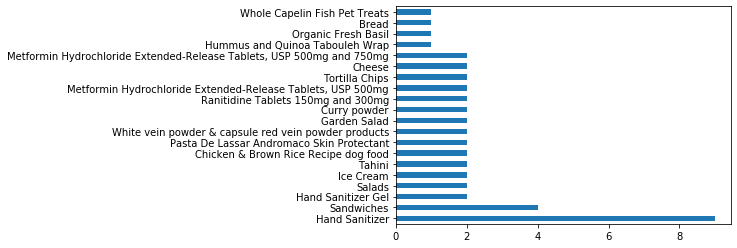

In [82]:
# plot with most recalled items
df['ProductDescription'].value_counts()[:20].plot(kind='barh')

In [116]:
# find companies with the most recalled items
df['Company'].value_counts()[:20]

Whole Foods Market                            11
Inspired Organics, LLC                         3
Fresh Express                                  3
Vitamin Cottage Natural Food Markets, Inc.     3
Lipari Foods, LLC                              3
Chukar Cherries                                3
Radagast Pet Food, Inc.                        3
H-E-B                                          3
OC Raw Dog, LLC                                2
Melanie Wholesale Inc.                         2
MarcasUSA, LLC                                 2
Hy-Vee Inc.                                    2
CME America                                    2
LL’s Magnetic Clay, Inc.                       2
PDX Aromatics                                  2
Giant Eagle, Inc.                              2
4e Brands North America                        2
Taro Pharmaceuticals U.S.A., Inc.              2
ALDI                                           2
Winter Gardens Quality Foods, Inc.             2
Name: Company, dtype

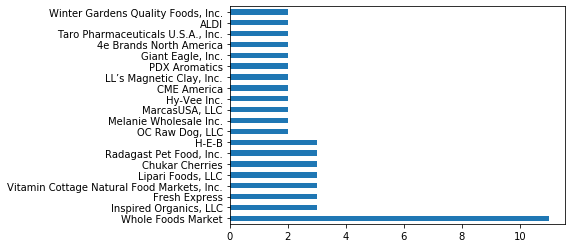

In [117]:
#plot the companies with the most recalled items
df['Company'].value_counts()[:20].plot(kind='barh')

In [119]:
# apply frequent item mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df.head()

,Brand,Company,ProductDescription,Reason
0,None,Laboratorios Jaloma S.A. de C.V.,Hand Sanitizer,Undeclared Methanol
1,None,SmithFoods Inc.,Vegan Non-Dairy Almond Based Frozen Desserts,Undeclared cashew
2,None,Albek de Mexico S.A. de C.V,Hand Sanitizer,Undeclared Methanol
3,None,Summitt Labs,Watermelon CBD oil tincture,Contains lead
4,None,Broncolin S.A. de C.V,Hand Sanitizer,Undeclared Methanol


In [127]:
 df["id"] = df.index + 1

In [128]:
df

,Brand,Company,ProductDescription,Reason,id
0,None,Laboratorios Jaloma S.A. de C.V.,Hand Sanitizer,Undeclared Methanol,1
1,None,SmithFoods Inc.,Vegan Non-Dairy Almond Based Frozen Desserts,Undeclared cashew,2
2,None,Albek de Mexico S.A. de C.V,Hand Sanitizer,Undeclared Methanol,3
3,None,Summitt Labs,Watermelon CBD oil tincture,Contains lead,4
4,None,Broncolin S.A. de C.V,Hand Sanitizer,Undeclared Methanol,5
...,...,...,...,...,...
372,None,purely elizabeth,Chocolate Sea Salt Probiotic Granola,Undeclared walnuts,373
373,None,"Lipari Foods, LLC",Wedge Sandwiches,Potential to be contaminated with Listeria mon...,374
374,None,Ducktrap River of Maine,Herring Center Cuts in Wine Sauce,Undeclared milk,375
375,None,Cargill,Dark chocolate covered cashews,Undeclared wheat,376


In [129]:
basket = (df[df['ProductDescription'] =="Hand Sanitizer"]
          .groupby(['id', 'Company'])['Reason']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))
basket

Company,4e Brands North America,"AAA Cosmetica, S.A. de C.V.",Albek de Mexico S.A. de C.V,Broncolin S.A. de C.V,LIQ-E S.A. de C.V.,Laboratorios Jaloma S.A. de C.V.,Real Clean Distribuciones SA de CV,"Resource Recovery & Trading, LLC"
id,,,,,,,,
1,0,0,0,0,0,Undeclared Methanol,0,0
3,0,0,Undeclared Methanol,0,0,0,0,0
5,0,0,0,Undeclared Methanol,0,0,0,0
6,Undeclared Methanol,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,Undeclared Methanol subpotency ethyl alcohol
9,0,0,0,0,0,0,Undeclared methanol,0
16,0,0,0,0,Potential Methanol Contamination,0,0,0
21,0,Potential Undeclared Methanol Contamination,0,0,0,0,0,0
24,Undeclared Methanol,0,0,0,0,0,0,0


In [124]:
def encode_units(x):
    if x == 0:   
        return 0
    if x != 0:
        return 1
basket_sets = basket.applymap(encode_units)
#basket_sets.drop('Company', inplace=True, axis=1)
basket_sets

Company,4e Brands North America,"AAA Cosmetica, S.A. de C.V.",Albek de Mexico S.A. de C.V,Broncolin S.A. de C.V,LIQ-E S.A. de C.V.,Laboratorios Jaloma S.A. de C.V.,Real Clean Distribuciones SA de CV,"Resource Recovery & Trading, LLC"
id,,,,,,,,
1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1,0
16,0,0,0,0,1,0,0,0
21,0,1,0,0,0,0,0,0
24,1,0,0,0,0,0,0,0


In [125]:
import numpy as np

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [126]:
rules[ (rules['lift'] >= 2) &
      (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
